In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import rcParams

plt.rcParams["figure.figsize"] = 8,4
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("StudentsPerformance.csv")

In [3]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# Check for possible null values in the dataset

In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Categorize columns

In [8]:
df["gender"] = df["gender"].astype("category")
df["race/ethnicity"] = df["race/ethnicity"].astype("category")
df["parental level of education"] = df["parental level of education"].astype("category") 
df["lunch"] = df["lunch"].astype("category")
df["test preparation course"] = df["test preparation course"].astype("category") 

In [9]:
df["total"] = df["math score"] +df["reading score"]+df["writing score"]

In [10]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


## Multivariate Analysis

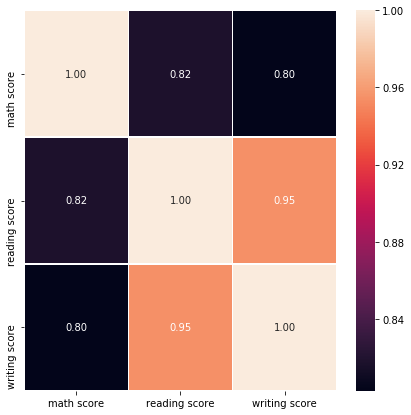

In [11]:
dfc= df.drop(columns="total")
dfc.corr()

f,ax = plt.subplots(figsize=(7, 7))
sns.heatmap(dfc.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

The above Heatmap shows that there is a high correlation between writing and reading score but less correlation between math score and writing score.

## Gender Analysis

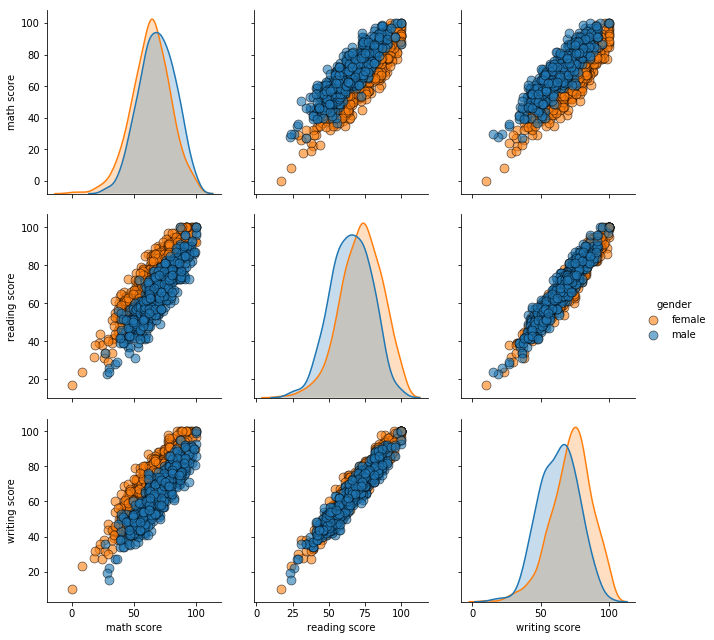

In [12]:
palette ={"male":"C0","female":"C1"}
sns.pairplot(df.loc[:, df.columns != 'total'], hue="gender", diag_kind="kde" ,palette = palette, plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'},size=3)
plt.show()

In [13]:
pl = df.groupby("gender")
pl=pl.mean()
cm = sns.light_palette("green", as_cmap=True)
s= pl.style.background_gradient(cmap=cm)
s

,math score,reading score,writing score,total
gender,,,,
female,63.6332,72.6081,72.4672,208.708
male,68.7282,65.473,63.3112,197.512


Male tend to perform better at maths exams while Females do better at reading and writing exams.

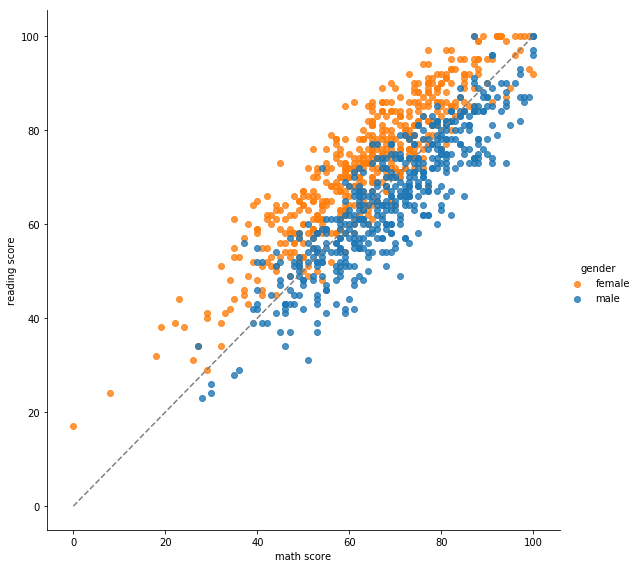

In [14]:
vis1= sns.lmplot(data= df, x="math score", y="reading score", fit_reg=False,palette = palette, hue="gender", height=8, aspect=1)
vis1.ax.plot((0,100),(0,100) ,c="gray", ls="--")
plt.show()

The above scatter plot visualizes again the better performance of males in math exams.

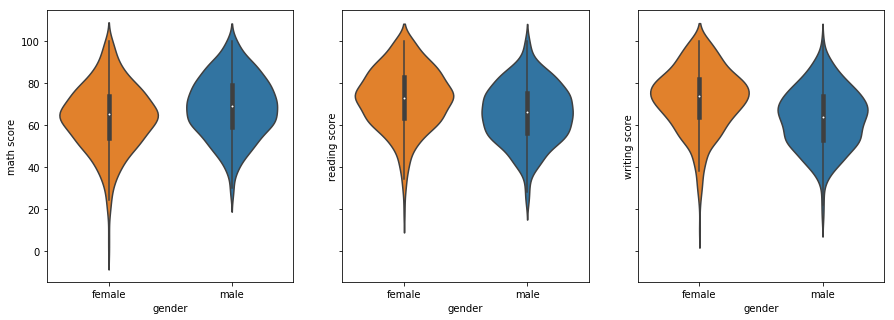

In [15]:
f, axes = plt.subplots(1,3,figsize=(15,5), sharex=True, sharey=True)
w = sns.violinplot(data=df, x="gender", y="math score",palette = palette,ax=axes[0])
w = sns.violinplot(data=df, x="gender", y="reading score",ax=axes[1]  , palette = palette )
w = sns.violinplot(data=df, x="gender", y="writing score",ax=axes[2], palette = palette)

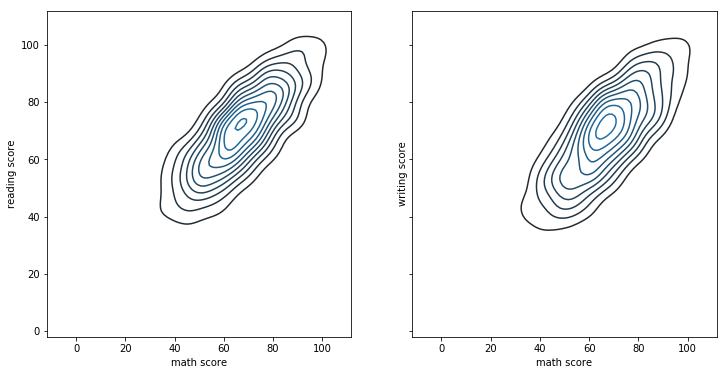

In [16]:
#k1= sns.kdeplot(df["math score"], df["reading score"], shade=True, shade_lowest = False, cmap= "Reds")
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True)
k1 = sns.kdeplot(df["math score"], df["reading score"], ax=axes[0]) 
k2 = sns.kdeplot(df["math score"], df["writing score"], ax=axes[1])

## Parental Level of Education Analysis

In [17]:
set(df["parental level of education"])

{"associate's degree",
 "bachelor's degree",
 'high school',
 "master's degree",
 'some college',
 'some high school'}

In [18]:
pl = df.groupby("parental level of education")

In [19]:
meanscore_byEducation =pl.mean()
medianscore_byEducation=pl.median()

In [20]:
cm = sns.light_palette("green", as_cmap=True)
s= meanscore_byEducation.style.background_gradient(cmap=cm)
s

,math score,reading score,writing score,total
parental level of education,,,,
associate's degree,67.8829,70.9279,69.8964,208.707
bachelor's degree,69.3898,73,73.3814,215.771
high school,62.1378,64.7041,62.449,189.291
master's degree,69.7458,75.3729,75.678,220.797
some college,67.1283,69.4602,68.8407,205.429
some high school,63.4972,66.9385,64.8883,195.324


The above table shows that there is a significant difference of student performance in exams for different levels of parent education. Students whose parents graduated with a Master's Degree perform significantly better that students whose parentswent to a High School.

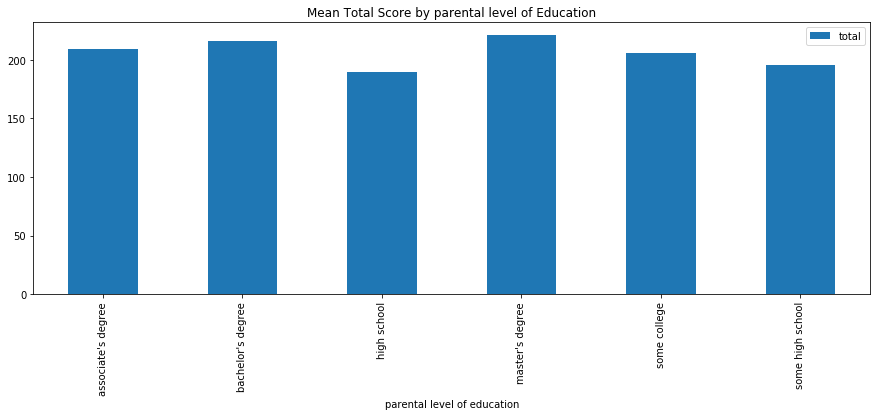

In [21]:
meanscore_byEducation.plot.bar(y="total",figsize=(15,5) )
plt.title("Mean Total Score by parental level of Education")
plt.show()

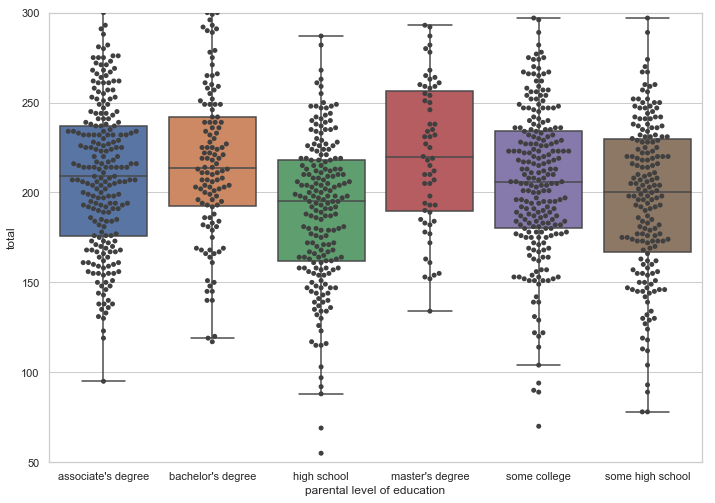

In [22]:
sns.set(style="whitegrid")
ax = sns.boxplot(x="parental level of education", y="total", data=df, showfliers = False)
plt.gcf().set_size_inches(11.7, 8.27)
ax = sns.swarmplot(x="parental level of education", y="total", data=df, color=".25")
plt.ylim((50,300))
plt.gcf().set_size_inches(11.7, 8.27)
plt.show()

The following violinplot visualizes if eating habits possibly influence the overall performance in exams.

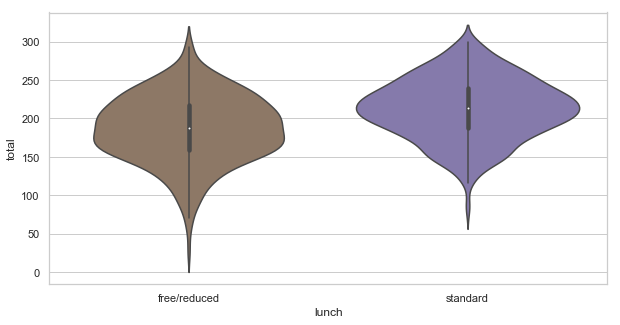

In [23]:
rcParams['figure.figsize'] = 10, 5
palette ={"free/reduced":"C5","standard":"C4"}
w = sns.violinplot(data=df, x="lunch", y="total",palette=palette)


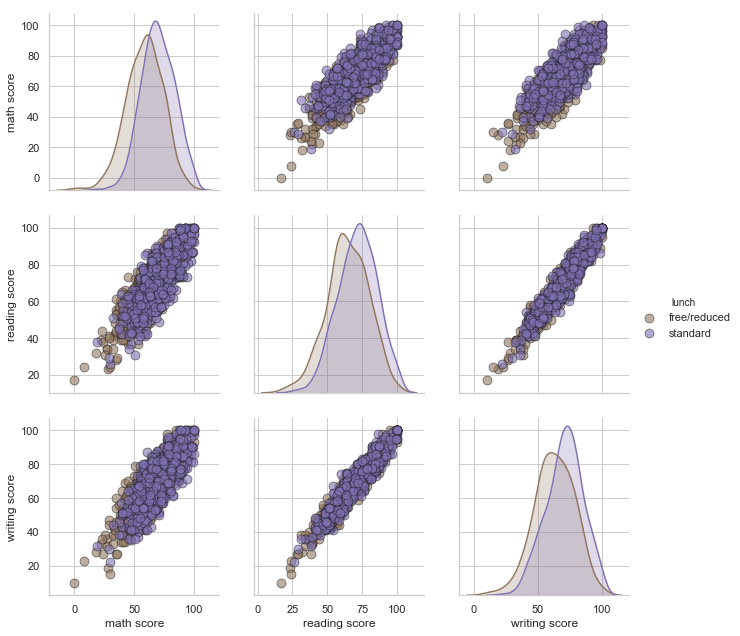

In [24]:
sns.pairplot(df.loc[:, df.columns != 'total'], hue="lunch",palette=palette, diag_kind="kde" , plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'},size=3)


The lunch preference does seem to have an influence on the overall exam performance. Student having a free/reduced meal score perform worse than students having standard meals.

In [25]:
df["test preparation course"].unique()

[none, completed]
Categories (2, object): [none, completed]

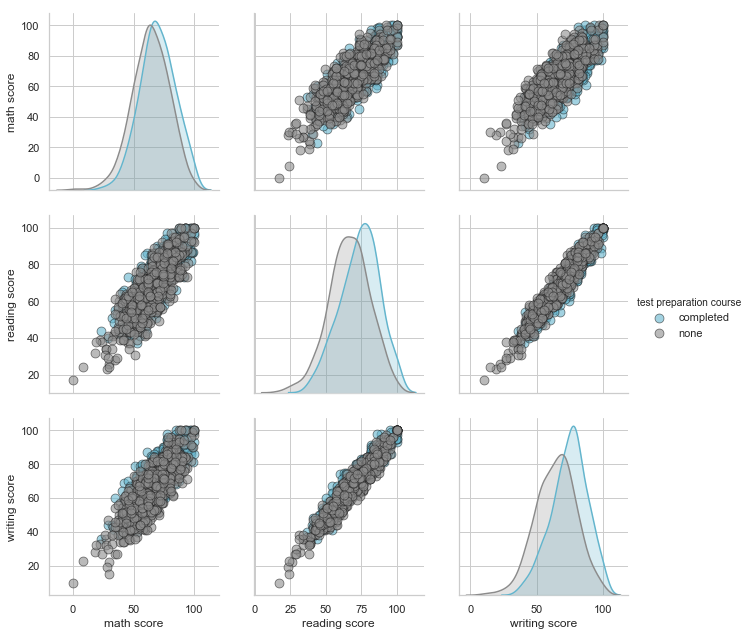

In [26]:
palette ={"none":"C7","completed":"C9"}
sns.pairplot(df.loc[:, df.columns != 'total'], hue="test preparation course", diag_kind="kde" , palette=palette,plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'},size=3)


In [27]:
prep =df.groupby("test preparation course")
prepare_mean = prep.mean()
prepare_mean

,math score,reading score,writing score,total
test preparation course,,,,
completed,69.695531,73.893855,74.418994,218.008380
none,64.077882,66.534268,64.504673,195.116822


In [28]:
df.mean().head()

math score        66.089
reading score     69.169
writing score     68.054
total            203.312
dtype: float64

In [29]:
dfc= df.drop(columns="total")
dfc.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


#  Logistic Regression

To get insights about students passing the math exam and to predict the performance of students in regards to passing the math exam we add an additional column. The grades are split as follows:
above 80 = A Grade <br>
70 to 80 = B Grade<br>
60 to 70 = C Grade<br>
50 to 60 = D Grade<br>
below 50 = Fail<br>

Note: These classificications are not based on real scenarious and are just defined for test purposes.

In [30]:
fil = df["math score"] < 50
print(fil.shape)
df[fil]


(1000,)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
7,male,group B,some college,free/reduced,none,40,43,39,122
9,female,group B,high school,free/reduced,none,38,60,50,148
11,male,group D,associate's degree,standard,none,40,52,43,135
17,female,group B,some high school,free/reduced,none,18,32,28,78
18,male,group C,master's degree,free/reduced,completed,46,42,46,134
22,male,group D,some college,standard,none,44,54,53,151
33,male,group D,some college,standard,none,40,42,38,120
55,female,group C,high school,free/reduced,none,33,41,43,117
59,female,group C,some high school,free/reduced,none,0,17,10,27


In [31]:
def failed(mathScore):
    if(mathScore<50): 
        return 1
    else: 
        return 0

In [32]:
#copy data model
X = df
#insert column (independent variable)
y = list(map(failed, X["math score"]))
#delete math score from model as it correlates with the math failed column
X = X.drop("math score", axis = 1)
X = X.drop("total", axis = 1)

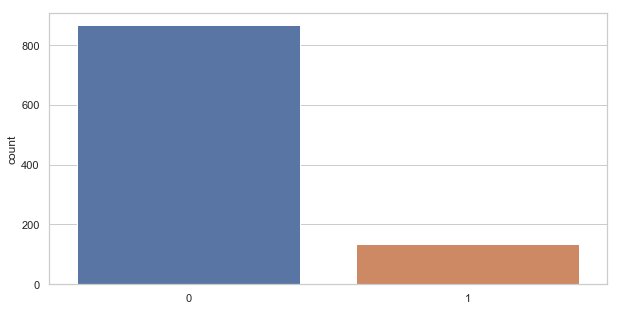

In [33]:
ax = sns.countplot( x=np.asarray(y))
rcParams['figure.figsize'] = 15, 5

In [34]:
#get categorical columns
def is_categorical(array_like):
    return array_like.dtype.name == 'category'

catFilter = [  is_categorical(X.iloc[:,i])  for i in range(0, len(X.columns) )] 
categoricalCols = X.columns[catFilter].tolist()
print(categoricalCols)    

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [35]:
#Get dummy variables for al categorical columns
cat_vars= categoricalCols
for var in cat_vars:
    cat_list = "var"+"_" +var
    cat_list = pd.get_dummies(X[var],drop_first=True, prefix=var)
    df1= X.join(cat_list)
    X= df1
    

In [36]:
#Remove original categorical columns
cat_vars= categoricalCols
data_vars=X.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
X_prepared = X[to_keep]

In [37]:
#Split data into test and training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size = 0.2, random_state = 0)

In [38]:
#Apply feature sclaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [39]:
#Build Logistic Regression classifier classifier
from sklearn.linear_model import LogisticRegression

logClassifier1 = LogisticRegression()
logClassifier1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [40]:
# Predicting the Test set results
y_pred = logClassifier1.predict(X_test)

# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

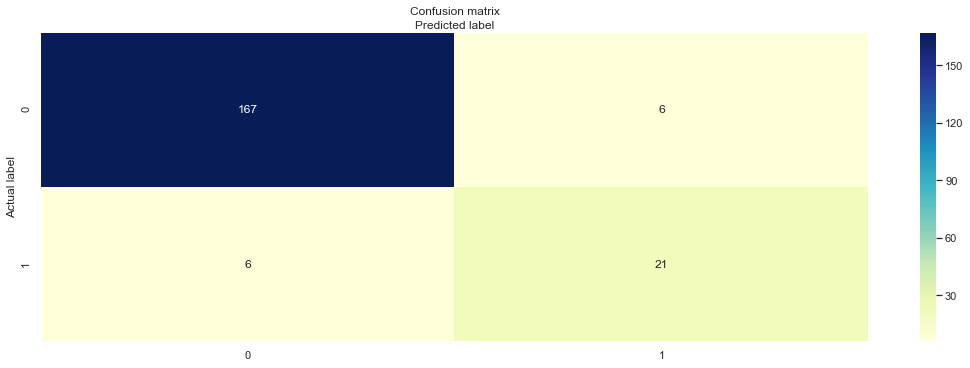

In [41]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [42]:
# Applying k-Fold Cross Validation to test model performance accross different validation subsets
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = logClassifier1, X = X_train, y = y_train, cv = 10, scoring="accuracy")
print(accuracies.mean() )
print(accuracies.std() )


0.9287935614939833
0.021617097337625152


In [43]:
#GRID SEARCH to find best model and hyperparameters
from sklearn.model_selection import GridSearchCV
parametersLog = [{'C':[0.01, 0.1,1,10,100,1000], 'penalty':["l1","l2"], 'fit_intercept':[True, False]  }]
grid_searchLog =GridSearchCV(estimator=logClassifier1, 
                          param_grid = parametersLog,
                          scoring = "accuracy", cv=10, n_jobs=-1)
grid_searchLog = grid_searchLog.fit(X_train,y_train)
best_accuracyLog = grid_searchLog.best_score_
best_parametersLog = grid_searchLog.best_params_

C:\Users\en355ry\myProgrammes\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [44]:
print(best_accuracyLog)
print(best_parametersLog)

0.92875
{'C': 1, 'fit_intercept': True, 'penalty': 'l1'}


The initial set of parameters was optimal across all other tested paramters.

### Building learning curve

In [45]:
train_sizes = list(np.linspace(0,639,5).astype(int))
print(train_sizes)
train_sizes2 = [1, 100, 500, 2000, 5000, 7654]

[0, 159, 319, 479, 639]


In [46]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, validation_scores = learning_curve(
                                         estimator = logClassifier1,
                                      X = X_train, y = y_train, train_sizes = np.linspace(.1, 1.0, 5), cv = 5,
                scoring = 'neg_mean_squared_error', shuffle=True)

In [47]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[-0.04761905 -0.01587302 -0.04761905 -0.01587302 -0.03174603]
 [-0.04347826 -0.04830918 -0.07729469 -0.07246377 -0.04830918]
 [-0.05128205 -0.07122507 -0.06552707 -0.06552707 -0.05128205]
 [-0.05454545 -0.05858586 -0.06868687 -0.05858586 -0.04848485]
 [-0.06416275 -0.06416275 -0.06259781 -0.05164319 -0.06259781]]

 ----------------------------------------------------------------------

Validation scores:

 [[-0.13043478 -0.0931677  -0.11875    -0.09433962 -0.1572327 ]
 [-0.06832298 -0.07453416 -0.08125    -0.08176101 -0.04402516]
 [-0.04968944 -0.06832298 -0.0875     -0.08805031 -0.05031447]
 [-0.05590062 -0.08074534 -0.08125    -0.08176101 -0.05660377]
 [-0.0621118  -0.08074534 -0.06875    -0.08805031 -0.05031447]]


In [48]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis =1 )

print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 63     0.031746
207    0.057971
351    0.060969
495    0.057778
639    0.061033
dtype: float64

 --------------------

Mean validation scores

 63     0.118785
207    0.069979
351    0.068775
495    0.071252
639    0.069994
dtype: float64


(0, 0.1)

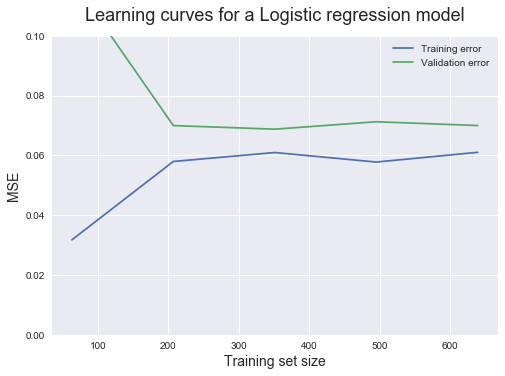

In [49]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Logistic regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,0.1)

In [50]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

X, y = X_train, y_train
print(X.shape)

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
print(clf.feature_importances_ )

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape 

(800, 14)
[0.29673883 0.34925575 0.070357   0.02377558 0.02195431 0.02170403
 0.01593347 0.01209158 0.01971947 0.0120841  0.02210883 0.02170237
 0.0855307  0.02704398]


(800, 3)

In [51]:
names = list(X_prepared.columns)
importance = clf.feature_importances_ 


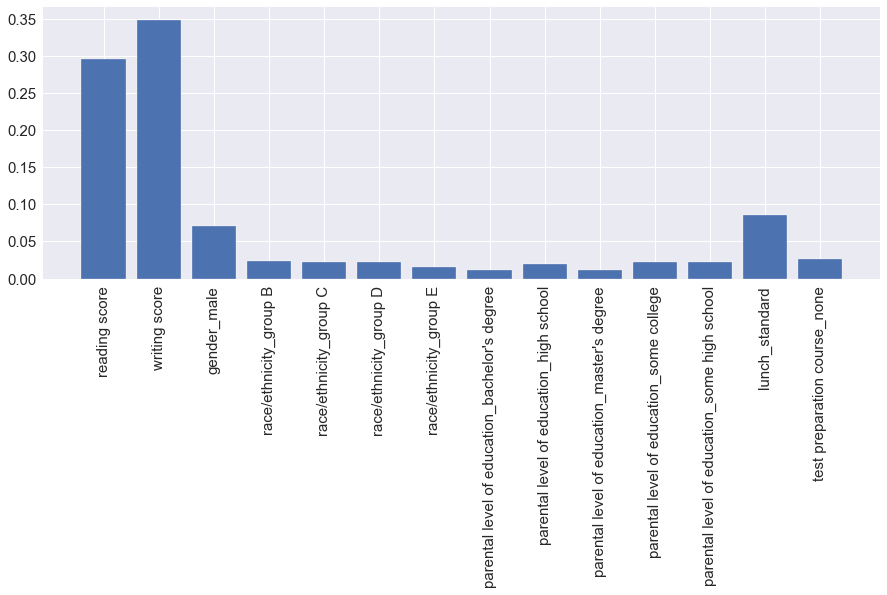

In [52]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5
plt.bar(np.arange(len(names)), importance   )
plt.xticks(np.arange(len(names))  , names, rotation='vertical')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [53]:
logClassifier2 = LogisticRegression()
logClassifier2.fit(X_new, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
# Predicting the Test set results
y_pred2 = logClassifier2.predict(model.transform(X_test))

# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred2)

In [55]:
print(model.transform(X_test).shape)
print(cm)

(200, 3)
[[167   6]
 [ 12  15]]


In [56]:
# Applying k-Fold Cross Validation to test model performance accross different validation subsets
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = logClassifier2, X = X_train, y = y_train, cv = 10, scoring="accuracy")
print(accuracies.mean() )
print(accuracies.std() )

0.9287935614939833
0.021617097337625152


In [57]:
import statsmodels.discrete.discrete_model as sm

X_neu = np.append(arr =np.ones((len(X_train),1) ).astype(int) ,values= X_train, axis =1  )

In [58]:
X_opt = X_neu[:,(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14)]
regressor_OLS = sm.Logit(endog= y_train, exog = X_opt).fit()
regressor_OLS.summary()

Optimization terminated successfully.
         Current function value: 0.137858
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  800
Model:                          Logit   Df Residuals:                      785
Method:                           MLE   Df Model:                           14
Date:                Mon, 15 Apr 2019   Pseudo R-squ.:                  0.6517
Time:                        21:57:05   Log-Likelihood:                -110.29
converged:                       True   LL-Null:                       -316.63
                                        LLR p-value:                 2.696e-79
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.5655      0.551    -10.095      0.000      -6.646      -4.485
x1            -0.2946      0.623     -0.473      0.637      -1.516       0.927
x2            -4.4853      0.793     -5.658      0.000      -6.039      -2.931
x3            -2.0125      0.270     -7.441      0.000      -2.543      -1.482
x4            -0.0621      0.237     -0.263      0.793      -0.526       0.401
x5            -0.1211      0.266     -0.456      0.648      -0.641       0.399
x6            -0.0271      0.261     -0.104      0.917      -0.539       0.485
x7            -0.7645      0.300     -2.546      0.011      -1.353      -0.176
x8            -0.0098      0.229     -0.043      0.966      -0.459       0.439
x9            -0.3476      0.201     -1.730      0.084      -0.741       0.046
x10            0.1501      0.211      0.713      0.476      -0.263       0.563
x11           -0.2610      0.224     -1.168      0.243      -0.699       0.177
x12           -0.3202      0.208     -1.537      0.124      -0.729       0.088
x13           -0.8371      0.179     -4.675      0.000      -1.188      -0.486
x14           -0.4823      0.228     -2.113      0.035      -0.930      -0.035
==============================================================================

Possibly complete quasi-separation: A fraction 0.23 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [59]:
X_opt = X_neu[:,(0,1,2,3,4,5,6,7,9,10,11,12,13,14)]
regressor_OLS = sm.Logit(endog= y_train, exog = X_opt).fit()
regressor_OLS.summary()

Optimization terminated successfully.
         Current function value: 0.137859
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  800
Model:                          Logit   Df Residuals:                      786
Method:                           MLE   Df Model:                           13
Date:                Mon, 15 Apr 2019   Pseudo R-squ.:                  0.6517
Time:                        21:57:05   Log-Likelihood:                -110.29
converged:                       True   LL-Null:                       -316.63
                                        LLR p-value:                 4.687e-80
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.5646      0.551    -10.103      0.000      -6.644      -4.485
x1            -0.2932      0.623     -0.471      0.638      -1.514       0.927
x2            -4.4875      0.791     -5.671      0.000      -6.038      -2.937
x3            -2.0131      0.270     -7.450      0.000      -2.543      -1.483
x4            -0.0621      0.237     -0.263      0.793      -0.526       0.401
x5            -0.1213      0.265     -0.457      0.648      -0.642       0.399
x6            -0.0273      0.261     -0.105      0.917      -0.540       0.485
x7            -0.7635      0.299     -2.550      0.011      -1.350      -0.177
x8            -0.3448      0.190     -1.811      0.070      -0.718       0.028
x9             0.1519      0.207      0.735      0.462      -0.253       0.557
x10           -0.2579      0.212     -1.219      0.223      -0.672       0.157
x11           -0.3175      0.198     -1.601      0.109      -0.706       0.071
x12           -0.8367      0.179     -4.682      0.000      -1.187      -0.486
x13           -0.4829      0.228     -2.119      0.034      -0.930      -0.036
==============================================================================

Possibly complete quasi-separation: A fraction 0.23 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [60]:
X_opt = X_neu[:,(0,1,2,3,4,5,7,9,10,11,12,13,14)]
regressor_OLS = sm.Logit(endog= y_train, exog = X_opt).fit()
regressor_OLS.summary()

Optimization terminated successfully.
         Current function value: 0.137866
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  800
Model:                          Logit   Df Residuals:                      787
Method:                           MLE   Df Model:                           12
Date:                Mon, 15 Apr 2019   Pseudo R-squ.:                  0.6517
Time:                        21:57:05   Log-Likelihood:                -110.29
converged:                       True   LL-Null:                       -316.63
                                        LLR p-value:                 7.850e-81
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.5654      0.551    -10.101      0.000      -6.645      -4.486
x1            -0.2922      0.622     -0.470      0.639      -1.512       0.928
x2            -4.4919      0.790     -5.686      0.000      -6.040      -2.944
x3            -2.0131      0.270     -7.452      0.000      -2.543      -1.484
x4            -0.0465      0.183     -0.254      0.800      -0.406       0.313
x5            -0.1029      0.199     -0.517      0.605      -0.493       0.288
x6            -0.7496      0.268     -2.794      0.005      -1.276      -0.224
x7            -0.3462      0.190     -1.823      0.068      -0.719       0.026
x8             0.1499      0.206      0.728      0.466      -0.253       0.553
x9            -0.2591      0.211     -1.226      0.220      -0.673       0.155
x10           -0.3173      0.198     -1.601      0.109      -0.706       0.071
x11           -0.8371      0.179     -4.685      0.000      -1.187      -0.487
x12           -0.4855      0.227     -2.140      0.032      -0.930      -0.041
==============================================================================

Possibly complete quasi-separation: A fraction 0.23 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [61]:
X_opt = X_neu[:,(0,1,2,3,5,7,9,10,11,12,13,14)]
regressor_OLS = sm.Logit(endog= y_train, exog = X_opt).fit()
regressor_OLS.summary()

Optimization terminated successfully.
         Current function value: 0.137906
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  800
Model:                          Logit   Df Residuals:                      788
Method:                           MLE   Df Model:                           11
Date:                Mon, 15 Apr 2019   Pseudo R-squ.:                  0.6516
Time:                        21:57:06   Log-Likelihood:                -110.32
converged:                       True   LL-Null:                       -316.63
                                        LLR p-value:                 1.290e-81
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.5594      0.549    -10.125      0.000      -6.636      -4.483
x1            -0.3104      0.618     -0.502      0.616      -1.522       0.901
x2            -4.4656      0.782     -5.713      0.000      -5.998      -2.933
x3            -2.0095      0.270     -7.449      0.000      -2.538      -1.481
x4            -0.0808      0.179     -0.451      0.652      -0.432       0.271
x5            -0.7319      0.259     -2.828      0.005      -1.239      -0.225
x6            -0.3464      0.190     -1.822      0.068      -0.719       0.026
x7             0.1501      0.206      0.729      0.466      -0.254       0.554
x8            -0.2561      0.211     -1.215      0.224      -0.669       0.157
x9            -0.3126      0.197     -1.583      0.113      -0.699       0.074
x10           -0.8358      0.179     -4.681      0.000      -1.186      -0.486
x11           -0.4799      0.226     -2.127      0.033      -0.922      -0.038
==============================================================================

Possibly complete quasi-separation: A fraction 0.23 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [62]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.589458
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.489   
Dependent Variable: y                AIC:              971.1334 
Date:               2019-04-15 21:57 BIC:              1036.7180
No. Observations:   800              Log-Likelihood:   -471.57  
Df Model:           13               LL-Null:          -316.63  
Df Residuals:       786              LLR p-value:      1.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     6.0000                                      
------------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
------------------------------------------------------------------
x1        0.0985     0.2797    0.3522   0.7247   -0.4497    0.6467
x2       -1.1765     0.3125   -3.7651   0.0002   -1.7889   -0.5641
x3 

#improve the model using less features using backward elimination
import statsmodels.formula.api as sm
#column with ones need to be added because statsmodel doesnt have
X = np.append(arr =np.ones((50,1) ).astype(int) ,values= X_train, axis =1  )
#am anfang alles, const ist erstes column mit einsen
X_opt = X[:,[0,1,2,3,4,5]]
regressor_OLS = sm.OLS(endog= y, exog = X_opt).fit()
regressor_OLS.summary()
#x2 is above 5% with 99% (0.05) therefore remove
X_opt = X[:,[0,1,3,4,5]]
regressor_OLS = sm.OLS(endog= y, exog = X_opt).fit()
regressor_OLS.summary()
#x1 above, remove
X_opt = X[:,[0,3,4,5]]
regressor_OLS = sm.OLS(endog= y, exog = X_opt).fit()
regressor_OLS.summary()
#x2 above remove
X_opt = X[:,[0,3,5]]
regressor_OLS = sm.OLS(endog= y, exog = X_opt).fit()
regressor_OLS.summary()
#slightly above, final step
X_opt = X[:,[0,3]]
regressor_OLS = sm.OLS(endog= y, exog = X_opt).fit()
regressor_OLS.summary()

#coefficient cant be compared. Only when saying per Unit can be compared
#sign can always be compared
#change per one unit
#coefficient portrait the additional effect every variable brings in 


In [63]:
X_train.shape

(800, 14)

## Neural network

In [64]:


#ANN CREATION
import keras
from keras.models import Sequential
from keras.layers import Dense


#Initialising ANN
classifier = Sequential()
#Adding input Layer and first hidden layer
classifier.add(Dense(input_dim=14, output_dim = 6, init= 'uniform', activation='relu'))#uniform to init weights
#add second hidden layer
classifier.add(Dense( output_dim = 6, init= 'uniform', activation='relu'))
#add  output layer
classifier.add(Dense( output_dim = 1, init= 'uniform', activation='sigmoid'))
#compile ANN
classifier.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics = ['accuracy'])
#fitting ANN to trainning set
classifier.fit(X_train, y_train, batch_size=10, nb_epoch=100)



#predict test set results
y_pred = classifier.predict(X_test)
y_pred= (y_pred>0.5)

#
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
800/800 [==============================] - 1s 2ms/step - loss: 0.6780 - acc: 0.8525
Epoch 2/100
800/800 [==============================] - 0s 210us/step - loss: 0.6299 - acc: 0.8650
Epoch 3/100
800/800 [==============================] - 0s 222us/step - loss: 0.5147 - acc: 0.8650
Epoch 4/100
800/800 [==============================] - 0s 177us/step - loss: 0.3865 - acc: 0.8650
Epoch 5/100
800/800 [==============================] - 0s 213us/step - loss: 0.3142 - acc: 0.8650
Epoch 6/100
800/800 [==============================] - 0s 244us/step - loss: 0.2778 - acc: 0.8650
Epoch 7/100
800/800 [==============================] - 0s 204us/step - loss: 0.2565 - acc: 0.8650
Epoch 8/100
800/800 [==============================] - 0s 196us/step - loss: 0.2427 - acc: 0.8650
Epoch 9/100
800/800 [==============================] - 0s 180us/step - loss: 0.2327 - acc: 0.8650


800/800 [==============================] - 0s 185us/step - loss: 0.0996 - acc: 0.9587
Epoch 78/100
800/800 [==============================] - 0s 205us/step - loss: 0.0984 - acc: 0.9550
Epoch 79/100
800/800 [==============================] - 0s 197us/step - loss: 0.0978 - acc: 0.9600
Epoch 80/100
800/800 [==============================] - 0s 221us/step - loss: 0.0979 - acc: 0.9600
Epoch 81/100
800/800 [==============================] - 0s 284us/step - loss: 0.0969 - acc: 0.9600
Epoch 82/100
800/800 [==============================] - 0s 246us/step - loss: 0.0970 - acc: 0.9587 0s - loss: 0.0879 - acc: 0.96
Epoch 83/100
800/800 [==============================] - 0s 204us/step - loss: 0.0968 - acc: 0.9550
Epoch 84/100
800/800 [==============================] - 0s 216us/step - loss: 0.0957 - acc: 0.9600
Epoch 85/100
800/800 [==============================] - 0s 219us/step - loss: 0.0952 - acc: 0.9612
Epoch 86/100
800/800 [==============================] - 0s 291us/step - loss: 0.0953 - acc: 

In [65]:
print(cm)

[[162  11]
 [  5  22]]


## SVM Model

In [66]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifierSVM = SVC(kernel = 'linear' , C=10)  # linear classifier in 2d is straight line
classifierSVM.fit(X_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [67]:
y_pred2 = classifierSVM.predict(X_test)

cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)

[[164   9]
 [  8  19]]


In [68]:
accuraciesSVM = cross_val_score(estimator = classifierSVM, X = X_train, y = y_train, cv = 10)
print(accuraciesSVM.mean() )
print(accuraciesSVM.std() )

0.9249964838255977
0.020157462733451544


In [69]:
#GRID SEARCH to find best model and hyperparameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C':[0.1,1,10,100,1000], 'kernel':['linear']  },
               {'C':[0.1,10,100,1000], 'kernel':['rbf'], 'gamma':[0.5,0.1,0.01,0.001,0.0001]}]
grid_search =GridSearchCV(estimator=classifierSVM, 
                          param_grid = parameters,
                          scoring = "accuracy", cv=10, n_jobs=-1)
grid_search = grid_search.fit(X_train,y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [70]:
print(best_accuracy)
print(best_parameters)

0.925
{'C': 10, 'kernel': 'linear'}


In [71]:
for idx, col_name in enumerate(X_prepared.columns):
    print("The coefficient for {} is {}".format(col_name, classifierSVM.coef_[0][idx]))


The coefficient for reading score is -0.19301487787862115
The coefficient for writing score is -2.5441476219977828
The coefficient for gender_male is -1.1989657527859339
The coefficient for race/ethnicity_group B is 0.11058585817777722
The coefficient for race/ethnicity_group C is -0.11987907329384484
The coefficient for race/ethnicity_group D is -0.07797938883607247
The coefficient for race/ethnicity_group E is -0.46573165491913304
The coefficient for parental level of education_bachelor's degree is 0.01692086623201794
The coefficient for parental level of education_high school is -0.2432130968370565
The coefficient for parental level of education_master's degree is 0.20480460470028716
The coefficient for parental level of education_some college is -0.2654249543389917
The coefficient for parental level of education_some high school is -0.12953823302780965
The coefficient for lunch_standard is -0.5807397241049483
The coefficient for test preparation course_none is -0.20815332159571742


In [72]:
print(classifierSVM.intercept_)

[-3.39363844]


## OLD

In [73]:
#copy data model
data_final = df
#insert column (independent variable)
data_final["failedMaths"] = list(map(failed, df["math score"]))
#delete math score from model as it correlates with the math failed column
data_final = data_final.drop("math score", axis = 1)
data_final = data_final.drop("race/ethnicity", axis = 1)
data_final = data_final.drop("total", axis = 1)



In [74]:
#create dummy variables for the categories
import numpy as np
cat_vars= ['gender','parental level of education','lunch','test preparation course']
for var in cat_vars:
   # cat_list = "var"+"_" +var
    cat_list = pd.get_dummies(data_final[var],drop_first=True, prefix=var)
    df1= data_final.join(cat_list)
    data_final= df1
    
#drop first argument is set to true, to avoid th edummy variable trap
    
cat_vars= ['gender','parental level of education','lunch','test preparation course']
data_vars=data_final.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

data_final = data_final[to_keep]
print(data_final.head(3))


   reading score  writing score  failedMaths  gender_male  \
0             72             74            0            0   
1             90             88            0            0   
2             95             93            0            0   

   parental level of education_bachelor's degree  \
0                                              1   
1                                              0   
2                                              0   

   parental level of education_high school  \
0                                        0   
1                                        0   
2                                        0   

   parental level of education_master's degree  \
0                                            0   
1                                            0   
2                                            1   

   parental level of education_some college  \
0                                         0   
1                                         1   
2                  

In [75]:
#reorder columns

data_final = data_final[ ['reading score', 'writing score',  'gender_male', "parental level of education_bachelor's degree", 'parental level of education_high school', "parental level of education_master's degree", 'parental level of education_some college', 'parental level of education_some high school', 'lunch_standard', 'test preparation course_none', 'failedMaths']]
print(data_final.columns)

Index(['reading score', 'writing score', 'gender_male',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_standard',
       'test preparation course_none', 'failedMaths'],
      dtype='object')


In [76]:
data_final.head()

,reading score,writing score,gender_male,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none,failedMaths
0,72,74,0,1,0,0,0,0,1,1,0
1,90,88,0,0,0,0,1,0,1,0,0
2,95,93,0,0,0,1,0,0,1,1,0
3,57,44,1,0,0,0,0,0,0,1,1
4,78,75,1,0,0,0,1,0,1,1,0


In [77]:
#scale the score figures
scores = [ 'reading score', 'writing score']
for i in scores:
    data_final[i]= data_final[i]/100
    
data_final.head(3)


,reading score,writing score,gender_male,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none,failedMaths
0,0.72,0.74,0,1,0,0,0,0,1,1,0
1,0.90,0.88,0,0,0,0,1,0,1,0,0
2,0.95,0.93,0,0,0,1,0,0,1,1,0


In [78]:
X = data_final.iloc[:, :-1].values
y = data_final.iloc[:,-1].values
#Splitting the dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)



In [79]:
#fitting logistic regression to test set

In [80]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state= 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [81]:
#predict test set results

In [82]:
y_pred = classifier.predict(X_test)

In [83]:
#check model performance with confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[167,   6],
       [  6,  21]], dtype=int64)

Our Model predicted in 167 cases correctly  that a student would not fail the maths class and in 21 cases that a student would fail a math class. In 6 cases the model predicted incorrectly that a student would pass the math exam. 

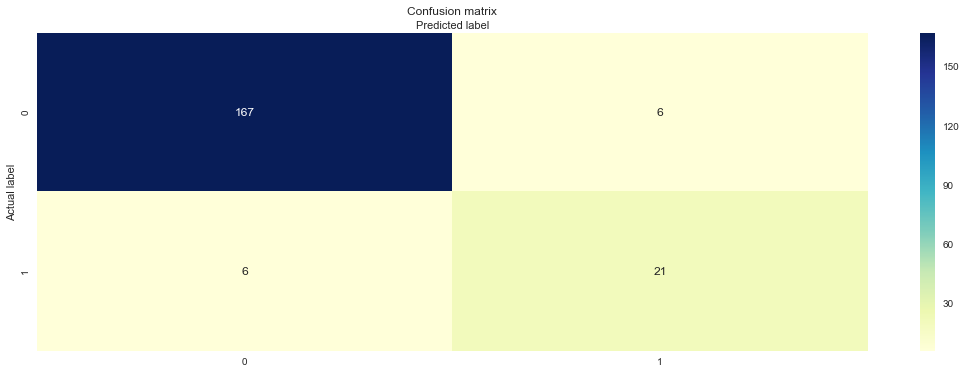

In [84]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.rcParams['figure.figsize'] = [10, 10]
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [85]:
X = data_final.loc[:, data_final.columns != 'failedMaths']
y = data_final.loc[:, data_final.columns == 'failedMaths']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['failedMaths'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['failedMaths']==0]))
print("Number of subscription",len(os_data_y[os_data_y['failedMaths']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['failedMaths']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['failedMaths']==1])/len(os_data_X))

length of oversampled data is  1204
Number of no subscription in oversampled data 602
Number of subscription 602
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [86]:
data_final_vars=data_final.columns.values.tolist()
y=['mathsFailed']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1]


In [87]:
cols = [ 'reading score', 'writing score', 'gender_male',
       
       
       "parental level of education_bachelor's degree",
       'parental level of education_high school',
       "parental level of education_master's degree",
       'parental level of education_some college',
       'parental level of education_some high school',
        'lunch_standard',
       
       'test preparation course_none']
newX=os_data_X
newy=os_data_y

In [88]:
import statsmodels.api as sm
logit_model=sm.Logit(newy,newX)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.496148
         Iterations 6
                                       Results: Logit
Model:                        Logit                     Pseudo R-squared:          0.284     
Dependent Variable:           failedMaths               AIC:                       1214.7248 
Date:                         2019-04-15 21:57          BIC:                       1265.6589 
No. Observations:             1204                      Log-Likelihood:            -597.36   
Df Model:                     9                         LL-Null:                   -834.55   
Df Residuals:                 1194                      LLR p-value:               1.7567e-96
Converged:                    1.0000                    Scale:                     1.0000    
No. Iterations:               6.0000                                                         
--------------------------------------------------------------------------------------------

In [89]:
cols = [ 'reading score', 'writing score',  'gender_male',
       "parental level of education_bachelor's degree",
       'parental level of education_some high school',
        'lunch_standard',
       'test preparation course_none'] 


In [90]:
X=os_data_X[cols]
y=os_data_y['failedMaths']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.497406
         Iterations 6
                                        Results: Logit
Model:                         Logit                     Pseudo R-squared:          0.282     
Dependent Variable:            failedMaths               AIC:                       1211.7540 
Date:                          2019-04-15 21:57          BIC:                       1247.4079 
No. Observations:              1204                      Log-Likelihood:            -598.88   
Df Model:                      6                         LL-Null:                   -834.55   
Df Residuals:                  1197                      LLR p-value:               1.2478e-98
Converged:                     1.0000                    Scale:                     1.0000    
No. Iterations:                6.0000                                                         
-----------------------------------------------------------------------------------

In [91]:
cols = [ 'writing score', 
       "parental level of education_bachelor's degree",
       'parental level of education_some high school',
        'lunch_standard',
       'test preparation course_none'] 

In [92]:
X=os_data_X[cols]
y=os_data_y['failedMaths']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.497558
         Iterations 6
                                        Results: Logit
Model:                        Logit                     Pseudo R-squared:          0.282      
Dependent Variable:           failedMaths               AIC:                       1208.1188  
Date:                         2019-04-15 21:57          BIC:                       1233.5858  
No. Observations:             1204                      Log-Likelihood:            -599.06    
Df Model:                     4                         LL-Null:                   -834.55    
Df Residuals:                 1199                      LLR p-value:               1.2644e-100
Converged:                    1.0000                    Scale:                     1.0000     
No. Iterations:               6.0000                                                          
-----------------------------------------------------------------------------------

In [93]:
result.predict()
y_pred = classifier.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[263,   0],
       [ 37,   0]], dtype=int64)